Run at least 10 ns and check convergence of the FES with sum_hills. Is your bias factor and height okay or do you need to change it? Or run longer?
sum_hills should produce a grid file which you can plot with imshow. Make a free energy surface with labeled axes and color bar. This time, add contour lines. This should look more like a surface than from replica exchange!
Bonus: If you use the --stride function to get many surfaces, can you make an animated gif of the free energy surface filling in?


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load data
# phi_fesdat1, psi_fesdat1, freeE_fesdat1, der_phi1, der_psi1 = fes_dat1[1], fes_dat1[2],fes_dat1[3], fes_dat1[4], fes_dat1[5]
fes_dat1= np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_6/StrideHills/adp_stateA_biasfactor10_pace500_height1.2_sigma0.55_2D_10ns.fes.dat1.dat", skiprows=5, unpack=True)
# phi_fesdat3, freeE_fesdat3 = ...
fes_dat3= np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_6/StrideHills/adp_stateA_biasfactor10_pace500_height1.2_sigma0.55_2D_10ns.fes.dat3.dat", skiprows=5, unpack=True)
# phi_fesdat10, freeE_fesdat10 = ... 
fes_dat10 = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_6/StrideHills/adp_stateA_biasfactor10_pace500_height1.2_sigma0.55_2D_10ns.fes.dat10.dat", skiprows=5, unpack=True)
# phi_fesdat20, freeE_fesdat20 = ...
fes_dat20 = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_6/StrideHills/adp_stateA_biasfactor10_pace500_height1.2_sigma0.55_2D_10ns.fes.dat20.dat", skiprows=5, unpack=True)
# phi_fesdat50, freeE_fesdat50 = ...
fes_dat50 = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_6/StrideHills/adp_stateA_biasfactor10_pace500_height1.2_sigma0.55_2D_10ns.fes.dat50.dat", skiprows=5, unpack=True)
# phi_fesdat100, freeE_fesdat100 = ...
fes_dat100 = np.loadtxt("/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_6/StrideHills/adp_stateA_biasfactor10_pace500_height1.2_sigma0.55_2D_10ns.fes.dat100.dat", skiprows=5, unpack=True)

# check data we are going to plot
print('fes_dat1:', fes_dat1.shape)
print('fes_dat3:', fes_dat3.shape)

print('fes_dat10:', fes_dat10.shape)
print('fes_dat20:', fes_dat20.shape)

print('fes_dat50:', fes_dat50.shape)
print('fes_dat100:', fes_dat100.shape)

#In this file, there are 33 different values for phi, 
# which means these 33 values will repeat in the same order, 
# so we only need the first 33 rows.
# It is the same for psi with 17 different values, and for free energy with [33*17=561] different values 

fes_dat1: (5, 561)
fes_dat3: (5, 561)
fes_dat10: (5, 561)
fes_dat20: (5, 561)
fes_dat50: (5, 561)
fes_dat100: (5, 561)


In [10]:
print("In this file, there are 33 different values for phi, which means these 33 values will repeat in the same order for 17 times, so we only need the first 33 rows.\nIt is quit similar for psi with 17 different values. But every unique value will repeat itself for 33 time, then the file turn to record the next unique value for 17 times.  \nFor free energy there are [33*17=561] different values ")

In this file, there are 33 different values for phi, which means these 33 values will repeat in the same order for 17 times, so we only need the first 33 rows.
It is quit similar for psi with 17 different values. But every unique value will repeat itself for 33 time, then the file turn to record the next unique value for 17 times.  
For free energy there are [33*17=561] different values 


In [21]:
# check and process the data
freeE_fesdat100 = fes_dat100[2].reshape(17,33)
psi_fesdat100 = fes_dat100[1][::33]
phi_fesdat100 = fes_dat100[0][:33]
print(freeE_fesdat100.shape)
print(psi_fesdat100.shape)
print(phi_fesdat100.shape)


(17, 33)
(17,)
(33,)


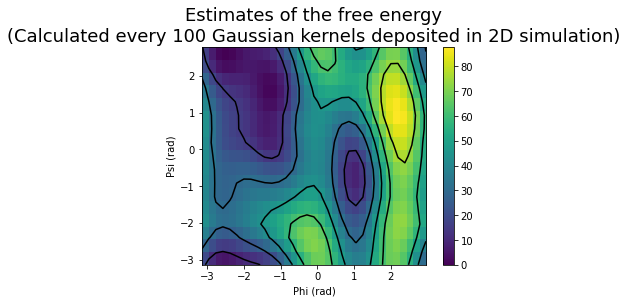

In [31]:
# Plot the free energy surface


phi_min = phi_fesdat100.min()
phi_max = phi_fesdat100.max()

psi_min = psi_fesdat100.min()
psi_max = psi_fesdat100.max()
fig, ax = plt.subplots()

im = ax.imshow(freeE_fesdat100,origin='lower',  extent=[phi_min, phi_max, psi_min, psi_max])

contour = ax.contour( phi_fesdat100,psi_fesdat100, freeE_fesdat100,colors='black', extent=[phi_min, phi_max, psi_min, psi_max])
ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')

ax.set_title("Estimates of the free energy\n(Calculated every 100 Gaussian kernels deposited in 2D simulation)", fontsize=18)
#ax.set_title("Calculated every 100 Gaussian kernels deposited in 2D simulation", fontsize=11)

fig.colorbar(im)
#plt.savefig('Figures/fes_A_metad_phipsi_last.pdf', bbox_inches="tight")
plt.savefig("../Figures/ADP_FreeEnergy_StrideHills_2D.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_FreeEnergy_StrideHills_2D.pdf")
plt.show()

Plot saved: ../Figures/ADP_FreeEnergy_StrideHills_2D.pdf


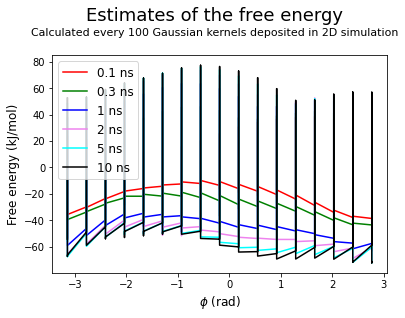

In [5]:
#define colors to use
colors = ['r', 'g', 'b', 'violet', 'aqua', 'black']                   
fig=plt.figure(2)

# plot
plt.plot(fes_dat1[1], fes_dat1[3], color=colors[0], label='0.1 ns')
plt.plot(fes_dat3[1], fes_dat3[3], color=colors[1], label='0.3 ns')
plt.plot(fes_dat10[1], fes_dat10[3], color=colors[2], label='1 ns')
plt.plot(fes_dat20[1], fes_dat20[3], color=colors[3], label='2 ns')
plt.plot(fes_dat50[1], fes_dat50[3], color=colors[4], label='5 ns')
plt.plot(fes_dat100[1], fes_dat100[3], color=colors[5], label='10 ns')
# legend
plt.legend(fontsize=12)
# set all labels
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel('Free energy (kJ/mol)', fontsize=12)

# set all titles
plt.text(x=0.5, y=1, s="Estimates of the free energy", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.95, s= "Calculated every 100 Gaussian kernels deposited in 2D simulation", fontsize=11, ha="center", transform=fig.transFigure)

# save figure
plt.savefig("../Figures/ADP_FreeEnergy_StrideHills_2D.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_FreeEnergy_StrideHills_2D.pdf")
plt.show()